In [1]:
import pydsm.cmd as cmd
from pydsm.utils import read_translate_csv
import os

## Project variables (all inputs are here)

In [ ]:
project_name = ''

disk_path = '/Volumes/Cache/SylvCiT/webodm'
tiles_directory = '/Volumes/Cache/SylvCiT/tiles'
epsg = 2950
tile_size = 40 # in meters
capture_height = 60 # in meters
scale = 0.02 # in meters/pixel
date = project_name[:10]

# True False

# Phase 1 - Reprojection & NDSM

mute_speech = False
REPROJECT = True
COMPUTE_NDSM = True
JPG_RENDER = True
OSM_REGISTRATION = False
TRANSLATE_GEOTIFF = False
TILE_GEOTIFF = False

# Phase 2 - OSM Registration

# mute_speech = True
# REPROJECT = False
# COMPUTE_NDSM = False
# JPG_RENDER = False
# OSM_REGISTRATION = True
# TRANSLATE_GEOTIFF = False
# TILE_GEOTIFF = False

# Phase 3 - Tiling

# mute_speech = False
# REPROJECT = False
# COMPUTE_NDSM = False
# JPG_RENDER = False
# OSM_REGISTRATION = False
# TRANSLATE_GEOTIFF = True
# TILE_GEOTIFF = True


## Project constants

In [3]:
ODM_PATH = 'assets/odm_orthophoto/odm_orthophoto.tif'
DTM_PATH = 'assets/odm_dem/dtm.tif'
DSM_PATH = 'assets/odm_dem/dsm.tif'

cmd.MUTE_SPEECH = mute_speech

project_path = os.path.join(disk_path, project_name)
OUTPUT_DIR = os.path.join(project_path, 'assets/2950')
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

orthophoto_path = os.path.join(OUTPUT_DIR, 'orthophoto.tif')
dtm_path = os.path.join(OUTPUT_DIR, 'dtm.tif')
dsm_path = os.path.join(OUTPUT_DIR, 'dsm.tif')
ndsm_path = os.path.join(OUTPUT_DIR, 'ndsm.tif')
translate_path = os.path.join(OUTPUT_DIR, 'translate.csv')

## Reprojection to EPSG:2950

In [4]:
if REPROJECT:
    _ = os.system('say "Starting the reprojection"')
    cmd.reproject_geotiff( os.path.join(project_path, ODM_PATH), orthophoto_path, epsg )
    cmd.reproject_geotiff( os.path.join(project_path, DTM_PATH), dtm_path, epsg )
    cmd.reproject_geotiff( os.path.join(project_path, DSM_PATH), dsm_path, epsg )
    _ = os.system('say "Reprojection complete"')

## Compute the NDSM

In [5]:
if COMPUTE_NDSM:
    _ = os.system('say "Starting the NDSM computing"')
    cmd.compute_ndsm(
        dsm_path=dsm_path,
        dtm_path=dtm_path,
        ndsm_path=ndsm_path,
        correct_dtm=True,
        capture_height=capture_height,
        resize=orthophoto_path,
    )
    _ = os.system('say "NDSM computing complete"')

## Terrain rendering (PNG)

In [6]:
if JPG_RENDER:
    _ = os.system('say "Starting the JPG rendering"')
    cmd.to_cmap(path=orthophoto_path, cmap='rgb')
    cmd.to_cmap(path=ndsm_path, cmap='terrain')
    cmd.to_cmap(path=dtm_path, cmap='terrain')
    cmd.to_cmap(path=dsm_path, cmap='terrain')
    _ = os.system('say "JPG rendering complete"')

## OSM Registration

In [7]:
if OSM_REGISTRATION:
    _ = os.system('say "Follow the instructions on the screen"')
    cmd.geotiff_registration(orthophoto_path, translate_path, translate=False)

In [ ]:
if TRANSLATE_GEOTIFF:
    _ = os.system('say "Starting the translation"')
    x, y = read_translate_csv(translate_path)
    cmd.translate_geotiff(orthophoto_path, x, y, orthophoto_path)
    cmd.translate_geotiff(ndsm_path, x, y, ndsm_path)
    cmd.translate_geotiff(dtm_path, x, y, dtm_path)
    cmd.translate_geotiff(dsm_path, x, y, dsm_path)
    _ = os.system('say "Translation complete"')

## Tile the geotiffs

* Extracting tiles from '/Volumes/Cache/SylvCiT/webodm/2025-06-30 parc lafontaine nord (servicemen nord)/assets/2950/orthophoto.tif'


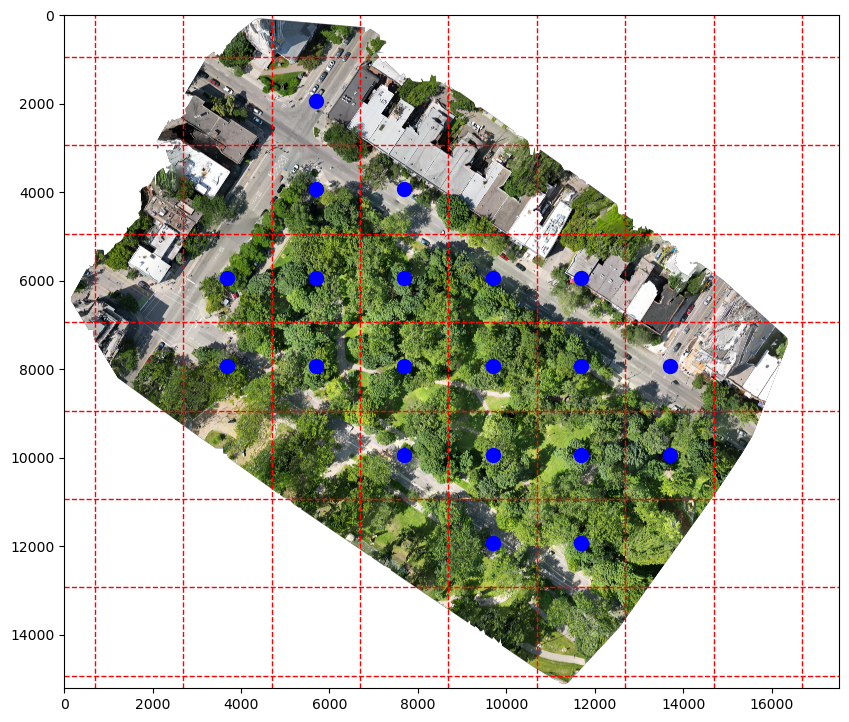

* Cropping orthophoto into tiles
  Tiles saved to '/Volumes/Cache/SylvCiT/tiles/orthophoto'
* Cropping NDSM into tiles
  Tiles saved to '/Volumes/Cache/SylvCiT/tiles/ndsm'
* Cropping DSM into tiles
  Tiles saved to '/Volumes/Cache/SylvCiT/tiles/dsm'


In [9]:
if TILE_GEOTIFF:
    _ = os.system('say "Starting tiling"')
    cmd.extract_tiles(
        orthophoto_path,  
        tiles_directory, 
        date, 
        tile_size, 
        scale,
        ndsm_path=ndsm_path,
        dsm_path=dsm_path,
    )
    _ = os.system('say "Tiling complete"')

In [10]:
_ = os.system('say "Current task complete"')